# 二、高维向量可视化(2分)

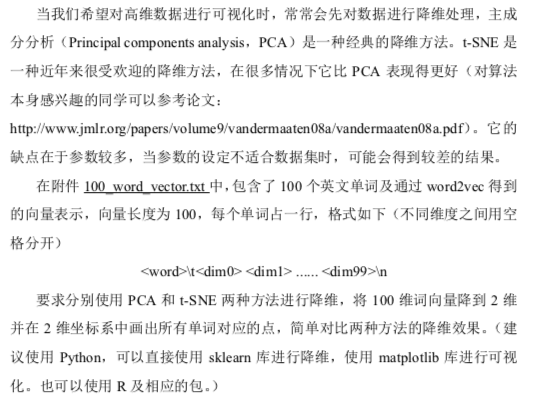

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
path = '../100_word_vector.txt'
words = []
vectors = np.zeros((100, 100))
with open(path, 'r') as f:
    for i in range(100):
        s = f.readline()
        t = s.find('\t')
        words.append(s[:t])
        a = s[t+1:-1].split(' ')
        for j in range(100):
            vectors[i][j] = float(a[j])
print('vectors loaded.')

vectors loaded.


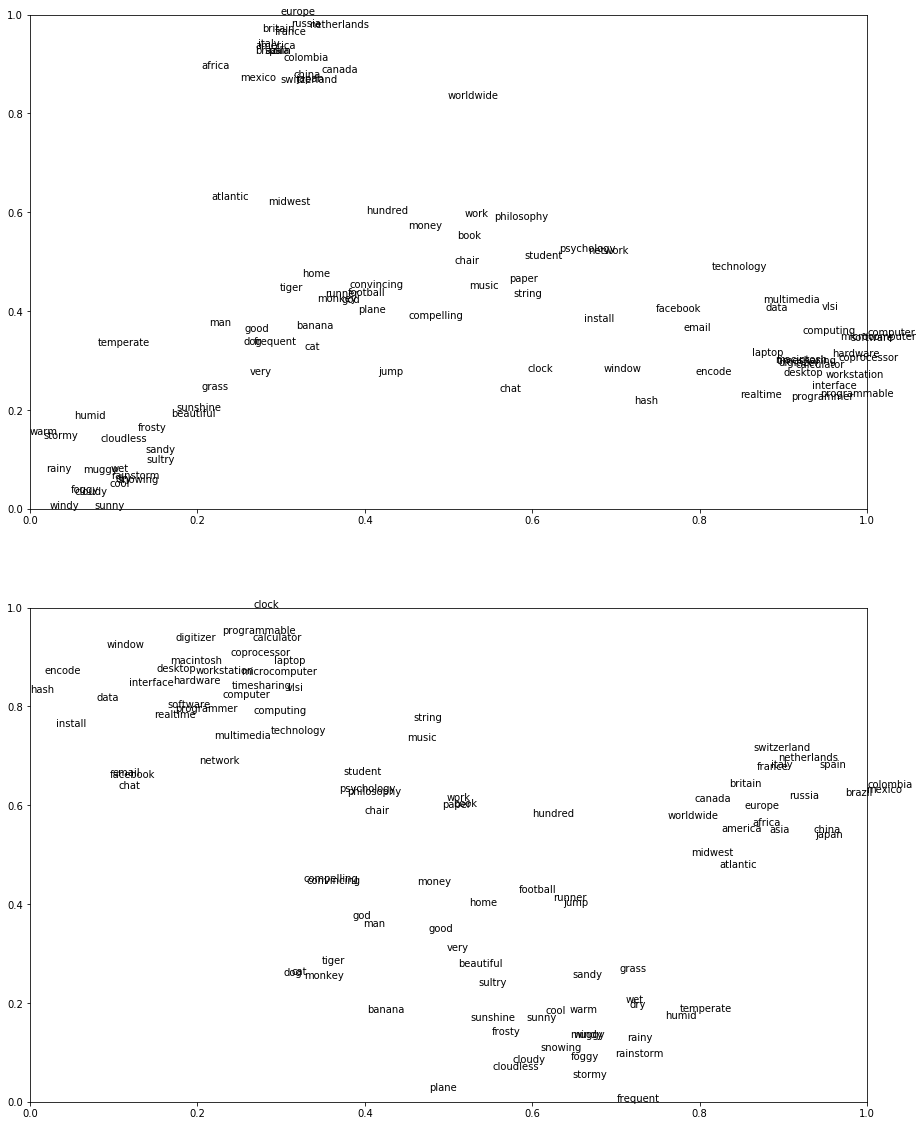

In [37]:
def normalize(result):
    t_min = result.min(axis=0)
    t_max = result.max(axis=0)
    return (result - t_min) / (t_max - t_min)


pca = PCA(n_components=2)
pca_reduced = normalize(pca.fit_transform(vectors))

tsne = TSNE(n_components=2, init='pca', random_state=19980723)
tsne_reduced = normalize(tsne.fit_transform(vectors))

plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
for i in range(100):
    plt.text(pca_reduced[i][0], pca_reduced[i][1], words[i])
plt.subplot(2, 1, 2)
for i in range(100):
    plt.text(tsne_reduced[i][0], tsne_reduced[i][1], words[i])
plt.show()